In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils import load_img, img_to_array, to_categorical
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'datasets/5-TRAFFIC-ANALYSIS-CNN'
image_width, image_height = 64, 64

X, y = [], []
class_names = {class_name: i for i, class_name in enumerate(os.listdir(dataset_path))}
num_classes = len(class_names)

for class_name in class_names:
    images = glob.glob(os.path.join(dataset_path, class_name, '*.jpg'))
    for image in images:
        img = load_img(image, target_size=(image_width, image_height))
        img = img_to_array(img)
        X.append(img)
        y.append(class_names[class_name])

X = np.array(X) / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y, num_classes=num_classes), test_size=0.2)

In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32,verbose=0)
score, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Score: {(score*100):.2f}% | Accuracy: {(acc*100):.2f} %")

Score: 2.18% | Accuracy: 99.52 %


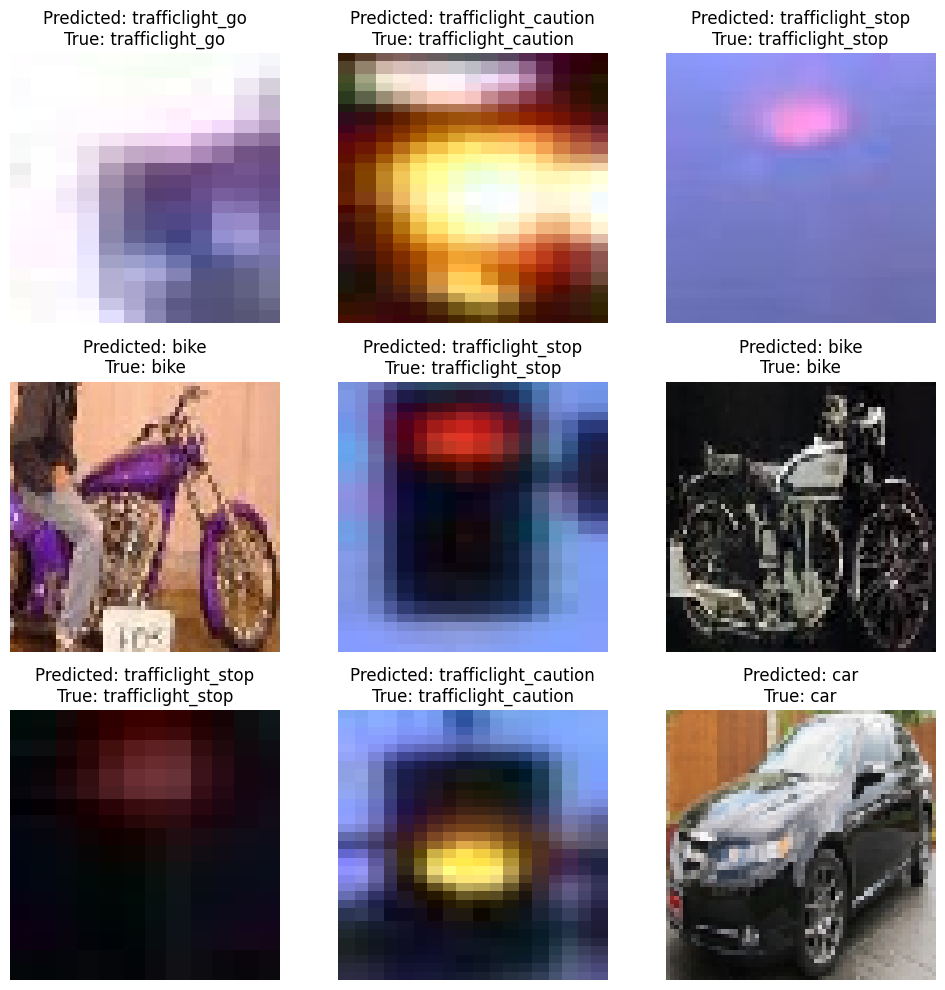

In [4]:
n=9
reverse_class_names = {i: class_name for class_name, i in class_names.items()}

y_pred = model.predict(X_test[:9], verbose=0)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test[:9], axis=1)

fig, ax = plt.subplots(3,3, figsize=(10,10))

for i in range(n):
    ax[i//3, i%3].imshow(X_test[i])
    pred_class = reverse_class_names[y_pred_class[i]]
    true_class = reverse_class_names[y_test_class[i]]
    ax[i//3, i%3].set_title(f"Predicted: {pred_class}\nTrue: {true_class}")
    ax[i//3, i%3].axis('off')
plt.tight_layout()